# Assignment 3

* Smith Agarwal - Mtr. No 03693295
* Shyam Arumugaswamy - Mtr. No 03694390
* Mainak Ghosh - Mtr. No 03693369
* Shayoni Halder - Mtr. No  03693443
* Aadhithya Sankar - Mtr. No 03693549

In [1]:
import numpy as np

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

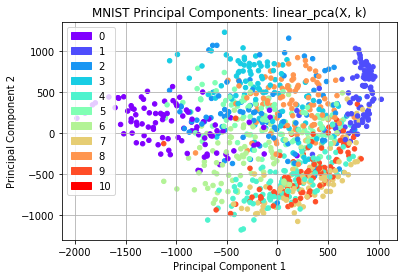

In [3]:
# Insert Code for Subtask 1.1 here

import imageio
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
%matplotlib inline

data_dir = './mnist'
len_classes = len(listdir(data_dir))
d_prefix=['d%d' % i for i in range(0, len_classes-1)]

# Sample colors from spectrum to represent each class
colors = cm.rainbow(np.linspace(0, 1, len_classes))

# Find number of samples from each class
n = np.zeros(len_classes)
for i,dp in enumerate(d_prefix):
    class_samples = listdir(data_dir + '/' + dp)
    n[i] = 100
    #Comment the above line and uncomment the below line to read all the images from classes
    #n[i] = len(class_samples)
    
N = int(sum(n))        # Total number of samples
X = np.zeros((784,N))  # Data matrix
Y = np.zeros(N)        # Vector for lables
C = np.zeros((N, 4))   # Vector for color

# Read data and populate X, Y and C
for i, dp in enumerate(d_prefix):
    Y[int(sum(n[:i])):int(sum(n[:i+1]))] = i
    C[int(sum(n[:i])):int(sum(n[:i+1])), :] = np.expand_dims(colors[i],axis=0)
    for j in range(int(n[i])):
        X[:, int(sum(n[:i]))+j] = np.float64(imageio.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())

# Get first k principal components of data
k = 2
S = linear_pca(X, k)

# Randomizing the order of data for plotting - so that no class is covered by another
idx_new = np.arange(N)
np.random.shuffle(idx_new)

# First 2 principal components
PC1 = S[0, idx_new]
PC2 = S[1, idx_new]

# Plot the first 2 principal components of data
plt.scatter(PC1, PC2, c=C[idx_new, :], s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components: linear_pca(X, k)')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, len_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()

In [4]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    
    # Center gram matrix K
    N = len(K)                  # Dimension of K = no of samples
    I = np.eye(N)               # NxN identity matrix
    A = np.full((N, N), 1./N)   # NxN matrix with values 1/N
    K_c = (I - A) @ K @ (I - A) # Centered gram matrix
    
    # SVD of K_c and principal components
    [V, Sigma2, VT] = np.linalg.svd(K_c, full_matrices = False)
    Sigma = np.sqrt(Sigma2)
    S = np.expand_dims(Sigma[:k], axis = 1) * VT[:k, :]
    
    return S

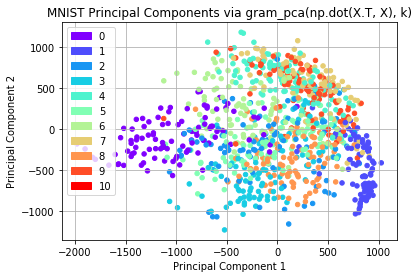

In [5]:
# Insert Code for Subtask 1.3 here

# Get first k principal components of data via gram_pca
k = 2 
K = np.dot(X.T, X)
S_gram = gram_pca(K, k)

# First 2 principal components via gram_pca
PC1_gram = S_gram[0, idx_new]
PC2_gram = S_gram[1, idx_new]

# Plot the first 2 gram principal components of data
plt.scatter(PC1_gram, PC2_gram, c=C[idx_new, :], s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via gram_pca(np.dot(X.T, X), k)')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, len_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()

In [6]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    
    K = np.zeros((X.shape[1], X.shape[1]))
    
    for i in range(X.shape[1]):
        # only compute K above main diagonal (inclusive)
        for j in range(i):
            # get all pair-wise differences in data
            pair_diff = X[:, i] - X[:, j]
            # take the squared norm for each of them
            sq_norm = np.sum(pair_diff*pair_diff)
            # plug each squared norm into the gaussian kernel
            K[i, j] = np.exp(-sq_norm/(2*(sigma**2)))
            # K is symmetric
            K[j, i] = K[i, j]
    
    
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

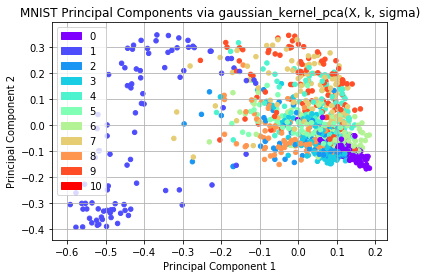

In [7]:
#Insert Code for Subtask 1.5 here

# Get first k principal components of data via gaussian_kernel_pca
k = 2
sigma = 1000
S_gauss = gaussian_kernel_pca(X, k, sigma)

# First 2 principal components via gaussian_kernel_pca
PC1_gauss = S_gauss[0, idx_new]
PC2_gauss = S_gauss[1, idx_new]

# Plot the first 2 gaussian-kernel principal components of data
plt.scatter(PC1_gauss, PC2_gauss, c=C[idx_new, :], s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via gaussian_kernel_pca(X, k, sigma)')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, len_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()